In [1]:
import numpy as np
import pandas as pd
import dimarray as da
import shutil
import os
from matplotlib import pylab as plt
sia_e =3.0
path_greenland = '/home/beckmann/mnt/cluhome/exp_pism/my_first_runs/input_data/'
run = 2
# sia_e =1.25

In [2]:
res = np.array([18000, 9000, 4500, 4500,4500])
times = np.array([-125000, -25000, -5000, -1000,0])
test = times +1
y_end=times[1:]
y_end=np.append(y_end,100)
surface_sheme =['smb + ftt@margins', 'smb + ftt@margins', 'smb + ftt@margins','smb + ftt@margins','smb + ftt@margins' ]
ice_eq = ['SIA', 'SIA', 'SIA', 'SIA+SSA','SIA+SSA' ]
# cali = ['']*res.size
# cali[-3] = 'calibration'
d = {'year': times,'resolution': res,  'surface_sheme': surface_sheme, 'ice_equation': ice_eq}
df = pd.DataFrame(data =d)

In [3]:
df

,year,resolution,surface_sheme,ice_equation
0,-125000,18000,smb + ftt@margins,SIA
1,-25000,9000,smb + ftt@margins,SIA
2,-5000,4500,smb + ftt@margins,SIA
3,-1000,4500,smb + ftt@margins,SIA+SSA
4,0,4500,smb + ftt@margins,SIA+SSA


In [4]:
def get_mx_my(d_inp,res):
    ''' input data, and wanted resolution for bootstrapping'''
    dx = d_inp.x[1]-d_inp.x[0]
    dy = d_inp.y[1]-d_inp.y[0]
    ly =( d_inp.y[-1]-d_inp.y[0]+dx)/2  #full grid length from corner to corner
    lx = (d_inp.x[-1]-d_inp.x[0]+dy)/2
    mx = (2*lx)/res
    my = (2*ly)/res
    
    return (mx,my)

d_inp = da.read_nc(path_greenland+'pism_Greenland_9000m_mcb_jpl_v_ctrl.nc')

skip = np.array([100,50,50,100,100])
Mz = ['-Mz 251 -Mbz 21'] *5
# Mz[-1] = '-Mz 501 -Mbz 41'
M_horizontal = []
time_command = []
time_command_test = []
#calutulate x and y length from resolution
for i,r in enumerate(res):
    mx,my = get_mx_my(d_inp,r)
    #print ('mx,', mx, 'my', my)
    M_horizontal.append('-Mx '+str(int(mx))+' -My '+str(int(my)))
    time_command.append('-ys '+str(int(times[i]))+ ' -ye '+str(int(y_end[i])))
    time_command_test.append('-ys '+str(int(times[i]))+ ' -ye '+str(int(test[i])))

d2 = {'year': times,'resolution': res,  '-Mx -My': M_horizontal, '-Mz': Mz, 'skip': skip, 'time command': time_command }
df2 = pd.DataFrame(data =d2)
df2

/home/beckmann/virtualenvironment/vpy3/local/lib/python3.6/site-packages/dimarray/io/nc.py:624: RuntimeWarning: 'nv4' dimension not found, define integer range
  warnings.warn(msg, RuntimeWarning)


,year,resolution,-Mx -My,-Mz,skip,time command
0,-125000,18000,-Mx 88 -My 152,-Mz 251 -Mbz 21,100,-ys -125000 -ye -25000
1,-25000,9000,-Mx 176 -My 304,-Mz 251 -Mbz 21,50,-ys -25000 -ye -5000
2,-5000,4500,-Mx 352 -My 608,-Mz 251 -Mbz 21,50,-ys -5000 -ye -1000
3,-1000,4500,-Mx 352 -My 608,-Mz 251 -Mbz 21,100,-ys -1000 -ye 0
4,0,4500,-Mx 352 -My 608,-Mz 251 -Mbz 21,100,-ys 0 -ye 100


In [5]:
ftt_file = '/home/beckmann/exp_pism/my_first_runs/input_data/ftt_18000m.nc'

In [6]:
dirs=[
    'paleo_125ka_25ka_sia_e_'+str(sia_e)+'_run'+str(run),
    'paleo_25ka_5ka_sia_e_'+str(sia_e)+'_run'+str(run),
    'paleo_5ka_1ka_sia_e_'+str(sia_e)+'_run'+str(run),
    'paleo_1ka_0a_sia_e_'+str(sia_e)+'_run'+str(run),
    'ctrl_0_100a_sia_e_'+str(sia_e)+'_run'+str(run),
]

pthout = '/home/beckmann/exp_pism/alison/spin_up/PISM_1.2.1/MARv3.11.2_CESM2/'
beds =[]
ts = []
out_state = []
out_dirs = []
for i,r in enumerate(res):
    name = 'pism_Greenland_'+str(int(r))+'m_mcb_jpl_v_no_bath.nc'
    beds.append(name)
    oname= 'gris_'+str(int(r))+'m.nc'
    name = 'ts_gris_'+str(int(r))+'m.nc'
    ts.append(pthout+dirs[i] +'/'+ name)
    name = 'gris_'+str(int(r))+'m.nc'
    out_state.append(pthout+dirs[i] +'/'+ name)
    out_dirs.append(pthout +dirs[i] +'/')
pism = '/home/beckmann/gitrepos/pism_v1.2.1/pism/bin/pismr'
input_dir = '/home/beckmann/icedata/pism_greenland_input/BedMachine/'
input_dir_pdd ='/home/beckmann/exp_pism/my_first_runs/spin_up_aschwanden/input_data/'  
CLUSTER = True

In [7]:
out_state

['/home/beckmann/exp_pism/alison/spin_up/PISM_1.2.1/MARv3.11.2_CESM2/paleo_125ka_25ka_sia_e_3.0_run2/gris_18000m.nc',
 '/home/beckmann/exp_pism/alison/spin_up/PISM_1.2.1/MARv3.11.2_CESM2/paleo_25ka_5ka_sia_e_3.0_run2/gris_9000m.nc',
 '/home/beckmann/exp_pism/alison/spin_up/PISM_1.2.1/MARv3.11.2_CESM2/paleo_5ka_1ka_sia_e_3.0_run2/gris_4500m.nc',
 '/home/beckmann/exp_pism/alison/spin_up/PISM_1.2.1/MARv3.11.2_CESM2/paleo_1ka_0a_sia_e_3.0_run2/gris_4500m.nc',
 '/home/beckmann/exp_pism/alison/spin_up/PISM_1.2.1/MARv3.11.2_CESM2/ctrl_0_100a_sia_e_3.0_run2/gris_4500m.nc']

In [8]:

ptt =pthout.split('exp_pism')[0]+'mnt/cluhome/exp_pism'+pthout.split('exp_pism')[-1]
for dirname in dirs:
    if not os.path.exists(ptt + dirname ):
        os.makedirs(ptt + dirname)

In [8]:
ptt

'/home/beckmann/mnt/cluhome/exp_pism/alison/spin_up/PISM_1.2.1/MARv3.11.2_CESM2/'

In [9]:
def write_run_script(scriptname, nodes, ntask,command,Test =False):
    CLUSTER = 'True'
    if Test:
        priority = '#SBATCH --qos=priority'
        time=''
    if Test is not True:
        priority = '#SBATCH --qos=short'
        time='#SBATCH --time=23:49:00'
    bash_lines=[
    '#!/bin/bash'
    '',
    time,
    priority,
    '#SBATCH --account=anthroia',
    '#SBATCH --nodes='+str(int(nodes)),
    '#SBATCH --ntasks-per-node='+str(int(ntask)),
    '#SBATCH --job-name='+scriptname.split('.sh')[0],
    '#SBATCH --output='+scriptname.split('.sh')[0]+'.out',
    '#SBATCH --constraint=haswell',
    ]

    with open ('./scripts/'+scriptname, 'w') as rsh:
        for line in bash_lines:
            rsh.write(line + '\n')
        rsh.write('\n')
        rsh.write('\n')
        rsh.write(command)
    if CLUSTER:
        shutil.copyfile('./scripts/'+scriptname, \
                        ptt+'scripts/'+scriptname, follow_symlinks=True) 

# pre runs create thk and ice mask for alison

In [19]:
i =0
regrid_command =' -regrid_vars litho_temp,enthalpy,age,tillwat,bmelt,Href,thk'
out_lastrun =  '/home/beckmann/exp_pism/alison/spin_up/PISM_1.2.1/MARv3.11.2_CESM2/paleo_1ka_0a_sia_e_3.0/gris_4500m.nc'
def write_command1_ftt_margins_nomass(nodes, ntask,sia_e,i=0,Test=True):
    #efile = out_dirs[i]+'extra_smb_'+str(res[i])+'.nc'
    efile = out_dirs[i]+ 'check.nc'
    
    if Test:
        command_t = time_command_test[i]
        t_end = str(int(test[i]))
        #sv =''
        extra = ' -extra_times '+ str(int(times[i]))+':monthly:'+str(int(times[i])+1) +\
        ' -extra_file '+ efile +' -extra_vars climatic_mass_balance,ice_surface_temp'
        save = ' '
        
    else:
        command_t = time_command[i]
        t_end = str(int(y_end[i]))
        extra = ' -extra_times '+ str(int(y_end[i]-1))+':monthly:'+t_end+\
        ' -extra_file '+efile+' -extra_vars climatic_mass_balance,ice_surface_temp'
        
        delta_snap = int((times[i+1] -times[i])/4)
        s_times = str(int(times[i]))+':'+str(delta_snap)+':'+t_end
        save = ' -save_file '+out_dirs[i]+'snapshots.nc -save_times ' +s_times
        
    ftt_file = input_dir+'ftt_'+str(res[i])+'m.nc'
    
    #s_times = str(int(times[i]))+':500:'+str(int(times[i+1]))
    
        #sv = ' -save_file '+ts[0].split('ts_')[0]+'snapshots.nc -save_times -25000,-5000,-1000'
    #todo!
#     MAR_clim18000 = '/home/beckmann/icedata/MAR_SMB/MARv3.9/ISMIP6/proj_monthly/results/'+'clim_mean_pism_SMB_'+str(res[i])+'m.nc'
    MAR_clim18000 = '/home/beckmann/icedata/MAR_SMB/Alison/clim_mean/'+'MAR-yr-mean-1961-1990-18km_time_pism.nc'
    #MAR_clim18000 = '/home/beckmann/icedata/MAR_SMB/MARv3.9/ISMIP6/proj_monthly/results/'+'clim_mean_pism_ST_only_18000m.nc'
   
    smbflx_paleo= '-surface given,forcing,delta_T'+\
    ' -surface_delta_T_file '+ input_dir_pdd +'pism_dT.nc -sea_level constant,delta_sl -ocean_delta_sl_file '+ \
    input_dir_pdd+'pism_dSL.nc'+\
    ' -surface_given_file '+MAR_clim18000 +' -surface_given_period 1'+\
    ' -force_to_thickness_file '+ftt_file +' -surface.force_to_thickness.ice_free_alpha_factor 1000'
    
    make_faster = '-stress_balance.sia.limit_diffusivity yes -stress_balance.sia.max_diffusivity 10.0 '+\
    '-stress_balance.ssa.fd.max_speed 30.0e3'
    
   
    
    command = 'srun -n '+str(int(nodes*ntask))+' '+pism+' -i '+ input_dir+beds[i]+' -bootstrap '+' -regrid_file '+ out_lastrun \
    +' '+ regrid_command+' '+ M_horizontal[i] + \
    ' -test_climate_models'+\
    ' ' + Mz[i] + ' -z_spacing equal -Lz 4000 -Lbz 2000 skip -skip_max ' +str(skip[0]) + ' -grid.registration center '+ command_t +\
    ' ' + smbflx_paleo + ' -options_left -stress_balance.sia.max_diffusivity 500.0'+\
     ' -calving eigen_calving,vonmises_calving,thickness_calving -eigen_calving_K 1e+16 -thickness_calving_threshold 50'+\
    ' -front_retreat_file '+input_dir + 'pism_Greenland_18000m_mcb_jpl_v_no_bath_front_retreat.nc' +\
    ' -sia_e '+str(sia_e) +\
    ' -ts_file '+ \
    ts[i]+ ' -ts_times '+ str(int(times[i]))+':yearly:'+str(int(t_end))+ \
    extra + \
    save +\
    ' -o ' +out_state[i].split('.nc')[0]+'_nomass.nc' + ' -o_format netcdf4_parallel -o_size medium'
    return(command)

In [20]:
i =1
regrid_command =' -regrid_vars litho_temp,enthalpy,age,tillwat,bmelt,Href,thk'
out_lastrun =  '/home/beckmann/exp_pism/alison/spin_up/PISM_1.2.1/MARv3.11.2_CESM2/paleo_1ka_0a_sia_e_3.0/gris_4500m.nc'
def write_command2_ftt_margins_nomass(nodes, ntask,sia_e,i=0,Test=True):
    #efile = out_dirs[i]+'extra_smb_'+str(res[i])+'.nc'
    efile = out_dirs[i]+ 'check.nc'
    
    if Test:
        command_t = time_command_test[i]
        t_end = str(int(test[i]))
        #sv =''
        extra = ' -extra_times '+ str(int(times[i]))+':monthly:'+str(int(times[i])+1) +\
        ' -extra_file '+ efile +' -extra_vars climatic_mass_balance,ice_surface_temp'
        save = ' '
        
    else:
        command_t = time_command[i]
        t_end = str(int(y_end[i]))
        extra = ' -extra_times '+ str(int(y_end[i]-1))+':monthly:'+t_end+\
        ' -extra_file '+efile+' -extra_vars climatic_mass_balance,ice_surface_temp'
        
        delta_snap = int((times[i+1] -times[i])/4)
        s_times = str(int(times[i]))+':'+str(delta_snap)+':'+t_end
        save = ' -save_file '+out_dirs[i]+'snapshots.nc -save_times ' +s_times
        
    ftt_file = input_dir+'ftt_'+str(res[i])+'m.nc'
    
    #s_times = str(int(times[i]))+':500:'+str(int(times[i+1]))
    
        #sv = ' -save_file '+ts[0].split('ts_')[0]+'snapshots.nc -save_times -25000,-5000,-1000'
    #todo!
#     MAR_clim18000 = '/home/beckmann/icedata/MAR_SMB/MARv3.9/ISMIP6/proj_monthly/results/'+'clim_mean_pism_SMB_'+str(res[i])+'m.nc'
    MAR_clim18000 = '/home/beckmann/icedata/MAR_SMB/Alison/clim_mean/'+'MAR-yr-mean-1961-1990-9km_time_pism.nc'
    #MAR_clim18000 = '/home/beckmann/icedata/MAR_SMB/MARv3.9/ISMIP6/proj_monthly/results/'+'clim_mean_pism_ST_only_18000m.nc'
   
    smbflx_paleo= '-surface given,forcing,delta_T'+\
    ' -surface_delta_T_file '+ input_dir_pdd +'pism_dT.nc -sea_level constant,delta_sl -ocean_delta_sl_file '+ \
    input_dir_pdd+'pism_dSL.nc'+\
    ' -surface_given_file '+MAR_clim18000 +' -surface_given_period 1'+\
    ' -force_to_thickness_file '+ftt_file +' -surface.force_to_thickness.ice_free_alpha_factor 1000'
    
    make_faster = '-stress_balance.sia.limit_diffusivity yes -stress_balance.sia.max_diffusivity 10.0 '+\
    '-stress_balance.ssa.fd.max_speed 30.0e3'
    
   
    
    command = 'srun -n '+str(int(nodes*ntask))+' '+pism+' -i '+ input_dir+beds[i]+' -bootstrap '+' -regrid_file '+ out_lastrun \
    +' '+ regrid_command+' '+ M_horizontal[i] + \
    ' -test_climate_models'+\
    ' ' + Mz[i] + ' -z_spacing equal -Lz 4000 -Lbz 2000 skip -skip_max ' +str(skip[0]) + ' -grid.registration center '+ command_t +\
    ' ' + smbflx_paleo + ' -options_left -stress_balance.sia.max_diffusivity 500.0'+\
     ' -calving eigen_calving,vonmises_calving,thickness_calving -eigen_calving_K 1e+16 -thickness_calving_threshold 50'+\
    ' -front_retreat_file '+input_dir + 'pism_Greenland_18000m_mcb_jpl_v_no_bath_front_retreat.nc' +\
    ' -sia_e '+str(sia_e) +\
    ' -ts_file '+ \
    ts[i]+ ' -ts_times '+ str(int(times[i]))+':yearly:'+str(int(t_end))+ \
    extra + \
    save +\
    ' -o ' +out_state[i].split('.nc')[0]+'_nomass.nc' + ' -o_format netcdf4_parallel -o_size medium'
    return(command)

In [25]:
Test = True

nodes = 4
ntask = 16
command = write_command1_ftt_margins_nomass(nodes,ntask,sia_e,0,Test)
write_run_script('run1_paleo125k_sia_e'+str(sia_e)+'_run'+str(run)+'.sh', nodes, ntask,command, Test)

In [33]:
Test = True
i=1

nodes = 4
ntask = 16
command = write_command2_ftt_margins_nomass(nodes,ntask,sia_e,i,Test)
write_run_script('run2_paleo_25ka_5ka_sia_e'+str(sia_e)+'_run'+str(run)+'.sh', nodes, ntask,command, Test)

# run 1

In [30]:
i =0
regrid_command =' -regrid_vars litho_temp,enthalpy,age,tillwat,bmelt,Href,thk'
out_lastrun =  '/home/beckmann/exp_pism/alison/spin_up/PISM_1.2.1/MARv3.11.2_CESM2/paleo_1ka_0a_sia_e_3.0/gris_4500m.nc'
def write_command1_ftt_margins(nodes, ntask,sia_e,i=0,Test=True):
    #efile = out_dirs[i]+'extra_smb_'+str(res[i])+'.nc'
    efile = out_dirs[i]+ 'check.nc'
    
    if Test:
        command_t = time_command_test[i]
        t_end = str(int(test[i]))
        #sv =''
        extra = ' -extra_times '+ str(int(times[i]))+':monthly:'+str(int(times[i])+1) +\
        ' -extra_file '+ efile +' -extra_vars climatic_mass_balance,ice_surface_temp'
        save = ' '
        
    else:
        command_t = time_command[i]
        t_end = str(int(y_end[i]))
        extra = ' -extra_times '+ str(int(y_end[i]-1))+':monthly:'+t_end+\
        ' -extra_file '+efile+' -extra_vars climatic_mass_balance,ice_surface_temp'
        
        delta_snap = int((times[i+1] -times[i])/4)
        s_times = str(int(times[i]))+':'+str(delta_snap)+':'+t_end
        save = ' -save_file '+out_dirs[i]+'snapshots.nc -save_times ' +s_times
        
    ftt_file = input_dir+'ftt_'+str(res[i])+'m.nc'
    
    #s_times = str(int(times[i]))+':500:'+str(int(times[i+1]))
    
        #sv = ' -save_file '+ts[0].split('ts_')[0]+'snapshots.nc -save_times -25000,-5000,-1000'
    #todo!
#     MAR_clim18000 = '/home/beckmann/icedata/MAR_SMB/MARv3.9/ISMIP6/proj_monthly/results/'+'clim_mean_pism_SMB_'+str(res[i])+'m.nc'
    MAR_clim18000 = '/home/beckmann/icedata/MAR_SMB/Alison/clim_mean/'+'MAR-yr-mean-1961-1990-18km-'+str(run-1)+'_time_pism.nc'
    #MAR_clim18000 = '/home/beckmann/icedata/MAR_SMB/MARv3.9/ISMIP6/proj_monthly/results/'+'clim_mean_pism_ST_only_18000m.nc'
   
    smbflx_paleo= '-surface given,forcing,delta_T'+\
    ' -surface_delta_T_file '+ input_dir_pdd +'pism_dT.nc -sea_level constant,delta_sl -ocean_delta_sl_file '+ \
    input_dir_pdd+'pism_dSL.nc'+\
    ' -surface_given_file '+MAR_clim18000 +' -surface_given_period 1'+\
    ' -force_to_thickness_file '+ftt_file +' -surface.force_to_thickness.ice_free_alpha_factor 1000'
    
    make_faster = '-stress_balance.sia.limit_diffusivity yes -stress_balance.sia.max_diffusivity 10.0 '+\
    '-stress_balance.ssa.fd.max_speed 30.0e3'
    
   
    
    command = 'srun -n '+str(int(nodes*ntask))+' '+pism+' -i '+ input_dir+beds[i]+' -bootstrap '+\
    ' '+ regrid_command+' '+ M_horizontal[i] + \
    ' -regrid_file '+ out_lastrun +\
    ' ' + Mz[i] + ' -z_spacing equal -Lz 4000 -Lbz 2000 skip -skip_max ' +str(skip[0]) + ' -grid.registration center '+ command_t +\
    ' ' + smbflx_paleo + ' -options_left -stress_balance.sia.max_diffusivity 500.0'+\
     ' -calving eigen_calving,vonmises_calving,thickness_calving -eigen_calving_K 1e+16 -thickness_calving_threshold 50'+\
    ' -front_retreat_file '+input_dir + 'pism_Greenland_18000m_mcb_jpl_v_no_bath_front_retreat.nc' +\
    ' -sia_e '+str(sia_e) +\
    ' -ts_file '+ \
    ts[i]+ ' -ts_times '+ str(int(times[i]))+':yearly:'+str(int(t_end))+ \
    extra + \
    save +\
    ' -o ' + out_state[i] + ' -o_format netcdf4_parallel -o_size medium'
    return(command)

In [32]:
Test = False

nodes = 8
ntask = 16
command = write_command1_ftt_margins(nodes,ntask,sia_e,0,Test)
write_run_script('run1_paleo125k_sia_e'+str(sia_e)+'_run'+str(run)+'.sh', nodes, ntask,command, Test)

## run 2

In [33]:
regrid_command =' -regrid_vars litho_temp,enthalpy,age,tillwat,bmelt,Href,thk'
def write_command2_ftt_margins(nodes, ntask,sia_e,i=1,Test=True):
    #efile = out_dirs[i]+'extra_smb_'+str(res[i])+'.nc'
    efile = out_dirs[i]+ 'check.nc'
    
    if Test:
        command_t = time_command_test[i]
        t_end = str(int(test[i]))
        #sv =''
        extra = ' -extra_times '+ str(int(times[i]))+':monthly:'+str(int(times[i])+1) +\
        ' -extra_file '+ efile +' -extra_vars climatic_mass_balance,ice_surface_temp'
        save = ' '
        
    else:
        command_t = time_command[i]
        t_end = str(int(y_end[i]))
        extra = ' -extra_times '+ str(int(y_end[i]-1))+':monthly:'+t_end+\
        ' -extra_file '+efile+' -extra_vars climatic_mass_balance,ice_surface_temp'
        
        delta_snap = int((times[i+1] -times[i])/4)
        s_times = str(int(times[i]))+':'+str(delta_snap)+':'+t_end
        save = ' -save_file '+out_dirs[i]+'snapshots.nc -save_times ' +s_times
        
    ftt_file = input_dir+'ftt_'+str(res[i])+'m.nc'
    
    #s_times = str(int(times[i]))+':500:'+str(int(times[i+1]))
    
        #sv = ' -save_file '+ts[0].split('ts_')[0]+'snapshots.nc -save_times -25000,-5000,-1000'
    #todo!
    MAR_clim = '/home/beckmann/icedata/MAR_SMB/Alison/clim_mean/'+'MAR-yr-mean-1961-1990-9km-'+str(run-1)+'_time_pism.nc'
    
   
    smbflx_paleo= '-surface given,forcing,delta_T'+\
    ' -surface_delta_T_file '+ input_dir_pdd +'pism_dT.nc -sea_level constant,delta_sl -ocean_delta_sl_file '+ \
    input_dir_pdd+'pism_dSL.nc'+\
    ' -surface_given_file '+MAR_clim +'  -surface_given_period 1'+\
    ' -force_to_thickness_file '+ftt_file +' -surface.force_to_thickness.ice_free_alpha_factor 1000'
    
    make_faster = '-stress_balance.sia.limit_diffusivity yes -stress_balance.sia.max_diffusivity 10.0 '+\
    '-stress_balance.ssa.fd.max_speed 30.0e3'
    
   
    
    command = 'srun -n '+str(int(nodes*ntask))+' '+pism+' -bootstrap  -i '+ input_dir+beds[i]+' -regrid_file '+ out_state[i-1] \
    +' '+ regrid_command+' ' + M_horizontal[i] + \
    ' ' + Mz[i] + ' -z_spacing equal -Lz 4000 -Lbz 2000 skip -skip_max ' +str(skip[0]) + ' -grid.registration center '+ command_t +\
    ' ' + smbflx_paleo + ' -options_left -stress_balance.sia.max_diffusivity 500.0'+\
     ' -calving eigen_calving,vonmises_calving,thickness_calving -eigen_calving_K 1e+16 -thickness_calving_threshold 50'+\
    ' -front_retreat_file '+input_dir + 'pism_Greenland_9000m_mcb_jpl_v_no_bath_front_retreat.nc' +\
    ' -sia_e '+str(sia_e) +\
    ' -ts_file '+ \
    ts[i]+ ' -ts_times '+ str(int(times[i]))+':yearly:'+str(int(t_end))+ \
    extra + \
    save +\
    ' -o ' + out_state[i] + ' -o_format netcdf4_parallel -o_size medium'
    return(command)

In [34]:
Test = False
i=1

nodes = 16
ntask = 16
command = write_command2_ftt_margins(nodes,ntask,sia_e,i,Test)
write_run_script('run2_paleo_25ka_5ka_sia_e'+str(sia_e)+'_run'+str(run)+'.sh', nodes, ntask,command, Test)

# RUN3

In [35]:
regrid_command =' -regrid_vars litho_temp,enthalpy,age,tillwat,bmelt,Href,thk'
def write_command3_ftt_margins(nodes, ntask,sia_e,i=2,Test=True):
    #efile = out_dirs[i]+'extra_smb_'+str(res[i])+'.nc'
    efile = out_dirs[i]+ 'check.nc'
    
    if Test:
        command_t = time_command_test[i]
        t_end = str(int(test[i]))
        #sv =''
        extra = ' -extra_times '+ str(int(times[i]))+':monthly:'+str(int(times[i])+1) +\
        ' -extra_file '+ efile +' -extra_vars climatic_mass_balance,ice_surface_temp'
        save = ' '
        
    else:
        command_t = time_command[i]
        t_end = str(int(y_end[i]))
        extra = ' -extra_times '+ str(int(y_end[i]-1))+':monthly:'+t_end+\
        ' -extra_file '+efile+' -extra_vars climatic_mass_balance,ice_surface_temp'
        
        delta_snap = int((times[i+1] -times[i])/4)
        s_times = str(int(times[i]))+':'+str(delta_snap)+':'+t_end
        save = ' -save_file '+out_dirs[i]+'snapshots.nc -save_times ' +s_times
        
    ftt_file = input_dir+'ftt_'+str(res[i])+'m.nc'
    
    #s_times = str(int(times[i]))+':500:'+str(int(times[i+1]))
    
        #sv = ' -save_file '+ts[0].split('ts_')[0]+'snapshots.nc -save_times -25000,-5000,-1000'
    #todo!
    MAR_clim = '/home/beckmann/icedata/MAR_SMB/Alison/clim_mean/'+'MAR-yr-mean-1961-1990-4.5km-'+str(run-1)+'_time_pism.nc'
    
   
    smbflx_paleo= '-surface given,forcing,delta_T'+\
    ' -surface_delta_T_file '+ input_dir_pdd +'pism_dT.nc -sea_level constant,delta_sl -ocean_delta_sl_file '+ \
    input_dir_pdd+'pism_dSL.nc'+\
    ' -surface_given_file '+MAR_clim +'  -surface_given_period 1'+\
    ' -force_to_thickness_file '+ftt_file +' -surface.force_to_thickness.ice_free_alpha_factor 1000'
    
    make_faster = '-stress_balance.sia.limit_diffusivity yes -stress_balance.sia.max_diffusivity 1000.0 '+\
    '-stress_balance.ssa.fd.max_speed 30.0e3'
    
   
    
    command = 'srun -n '+str(int(nodes*ntask))+' '+pism+' -bootstrap  -i '+ input_dir+beds[i]+' -regrid_file '+ out_state[i-1] \
    +' '+ regrid_command+' ' + M_horizontal[i] + \
    ' ' + Mz[i] + ' -z_spacing equal -Lz 4000 -Lbz 2000 skip -skip_max ' +str(skip[0]) + ' -grid.registration center '+ command_t +\
    ' ' + smbflx_paleo + ' -options_left '+\
    make_faster +\
    ' -calving eigen_calving,vonmises_calving,thickness_calving -eigen_calving_K 1e+16 -thickness_calving_threshold 50'+\
    ' -front_retreat_file '+input_dir + 'pism_Greenland_4500m_mcb_jpl_v_no_bath_front_retreat.nc' +\
    ' -sia_e '+str(sia_e) +\
    ' -ts_file '+ \
    ts[i]+ ' -ts_times '+ str(int(times[i]))+':yearly:'+str(int(t_end))+ \
    extra + \
    save +\
    ' -o ' + out_state[i] + ' -o_format netcdf4_parallel -o_size medium'
    return(command)

In [36]:
dirs

['paleo_125ka_25ka_sia_e_3.0_run2',
 'paleo_25ka_5ka_sia_e_3.0_run2',
 'paleo_5ka_1ka_sia_e_3.0_run2',
 'paleo_1ka_0a_sia_e_3.0_run2',
 'ctrl_0_100a_sia_e_3.0_run2']

In [37]:
Test = False
i=2

nodes = 8
ntask = 16
command = write_command3_ftt_margins(nodes,ntask,sia_e,i,Test)
write_run_script('run3_paleo_5ka_1ka_sia_e_3.0_sia_e'+str(sia_e)+'_run'+str(run)+'.sh', nodes, ntask,command, Test)

# run 4

In [38]:
regrid_command =' -regrid_vars litho_temp,enthalpy,age,tillwat,bmelt,Href,thk'
def write_command4_ftt_margins(nodes, ntask,sia_e,i=3,Test=True):
    #efile = out_dirs[i]+'extra_smb_'+str(res[i])+'.nc'
    efile = out_dirs[i]+ 'check.nc'
    
    if Test:
        command_t = time_command_test[i]
        t_end = str(int(test[i]))
        #sv =''
        extra = ' -extra_times '+ str(int(times[i]))+':monthly:'+str(int(times[i])+1) +\
        ' -extra_file '+ efile +' -extra_vars climatic_mass_balance,ice_surface_temp'
        save = ' '
        
    else:
        command_t = time_command[i]
        t_end = str(int(y_end[i]))
        extra = ' -extra_times '+ str(int(y_end[i]-1))+':monthly:'+t_end+\
        ' -extra_file '+efile+' -extra_vars climatic_mass_balance,ice_surface_temp'
        delta_snap = int((times[i+1] -times[i])/4)
#         delta_snap = int((0 -times[i])/4)
        s_times = str(int(times[i]))+':'+str(delta_snap)+':'+t_end
        save = ' -save_file '+out_dirs[i]+'snapshots.nc -save_times ' +s_times
        
    ftt_file = input_dir+'ftt_'+str(res[i])+'m.nc'
    
    #s_times = str(int(times[i]))+':500:'+str(int(times[i+1]))
    
        #sv = ' -save_file '+ts[0].split('ts_')[0]+'snapshots.nc -save_times -25000,-5000,-1000'
    #todo!
    MAR_clim = '/home/beckmann/icedata/MAR_SMB/Alison/clim_mean/'+'MAR-yr-mean-1961-1990-4.5km-'+str(run-1)+'_time_pism.nc'
    
   
    smbflx_paleo= '-surface given,forcing,delta_T'+\
    ' -surface_delta_T_file '+ input_dir_pdd +'pism_dT.nc -sea_level constant,delta_sl -ocean_delta_sl_file '+ \
    input_dir_pdd+'pism_dSL.nc'+\
    ' -surface_given_file '+MAR_clim +'  -surface_given_period 1'+\
    ' -force_to_thickness_file '+ftt_file +' -surface.force_to_thickness.ice_free_alpha_factor 1000'
    
    make_faster = '-stress_balance.sia.limit_diffusivity yes -stress_balance.sia.max_diffusivity 1000.0 '+\
    '-stress_balance.ssa.fd.max_speed 30.0e3'
        
    command_sia_and_ssa = ' -stress_balance ssa+sia - vertical_velocity_approximation upstream' + \
    ' -sia_e '+str(sia_e)+' -sia_n 3 -ssa_e 1 -ssa_n 3 ' + \
    '-pseudo_plastic_q 0.6 -till_effective_fraction_overburden 0.02 -topg_to_phi 5.0,40.0,-700,700' +\
    ' -cfbc -kill_icebergs -part_grid -part_redist -pseudo_plastic -tauc_slippery_grounding_lines' +\
    ' -hydrology null -hydrology_null_diffuse_till_water'
   
    
    command = 'srun -n '+str(int(nodes*ntask))+' '+pism+' -bootstrap  -i '+ input_dir+beds[i]+' -regrid_file '+ out_state[i-1] \
    +' '+ regrid_command+' ' + M_horizontal[i] + \
    ' ' + Mz[i] + ' -z_spacing equal -Lz 4000 -Lbz 2000 skip -skip_max ' +str(skip[0]) + ' -grid.registration center '+ command_t +\
    ' ' + smbflx_paleo + ' -options_left '+\
    make_faster +\
     ' -calving eigen_calving,vonmises_calving,thickness_calving -eigen_calving_K 1e+16 -thickness_calving_threshold 50'+\
    ' -front_retreat_file '+input_dir + 'pism_Greenland_4500m_mcb_jpl_v_no_bath_front_retreat.nc' +\
    command_sia_and_ssa +\
    ' -ts_file '+ \
    ts[i]+ ' -ts_times '+ str(int(times[i]))+':yearly:'+str(int(t_end))+ \
    extra + \
    save +\
    ' -o ' + out_state[i] + ' -o_format netcdf4_parallel -o_size medium'
    return(command)

In [39]:
out_state

['/home/beckmann/exp_pism/alison/spin_up/PISM_1.2.1/MARv3.11.2_CESM2/paleo_125ka_25ka_sia_e_3.0_run2/gris_18000m.nc',
 '/home/beckmann/exp_pism/alison/spin_up/PISM_1.2.1/MARv3.11.2_CESM2/paleo_25ka_5ka_sia_e_3.0_run2/gris_9000m.nc',
 '/home/beckmann/exp_pism/alison/spin_up/PISM_1.2.1/MARv3.11.2_CESM2/paleo_5ka_1ka_sia_e_3.0_run2/gris_4500m.nc',
 '/home/beckmann/exp_pism/alison/spin_up/PISM_1.2.1/MARv3.11.2_CESM2/paleo_1ka_0a_sia_e_3.0_run2/gris_4500m.nc',
 '/home/beckmann/exp_pism/alison/spin_up/PISM_1.2.1/MARv3.11.2_CESM2/ctrl_0_100a_sia_e_3.0_run2/gris_4500m.nc']

In [40]:
Test = False
i=3

nodes = 8
ntask = 16
command = write_command4_ftt_margins(nodes,ntask,sia_e,i,Test)
write_run_script('run4_paleo_1ka_0a_sia_e_3.0_sia_e'+str(sia_e)+'_run'+str(run)+'.sh', nodes, ntask,command, Test)

## run agian no ftt lets checl

## Ctrl

In [41]:
regrid_command =' -regrid_vars litho_temp,enthalpy,age,tillwat,bmelt,Href,thk'
def write_ctrl_ftt_margins(nodes, ntask,sia_e,i=3,Test=True):
    #efile = out_dirs[i]+'extra_smb_'+str(res[i])+'.nc'
    efile = out_dirs[i]+ 'check.nc'
    
    if Test:
        command_t = time_command_test[i]
        t_end = str(int(test[i]))
        #sv =''
        extra = ' -extra_times '+ str(int(times[i]))+':monthly:'+str(int(times[i])+1) +\
        ' -extra_file '+ efile +' -extra_vars climatic_mass_balance,ice_surface_temp'
        save = ' '
        
    else:
        command_t = time_command[i]
        t_end = str(int(y_end[i]))
        extra = ' -extra_times '+ str(int(y_end[i]-1))+':monthly:'+t_end+\
        ' -extra_file '+efile+' -extra_vars climatic_mass_balance,ice_surface_temp'
        
        delta_snap = int((y_end[i])/4)
        s_times = str(int(times[i]))+':'+str(delta_snap)+':'+t_end
        save = ' -save_file '+out_dirs[i]+'snapshots.nc -save_times ' +s_times
        
    ftt_file = input_dir+'ftt_'+str(res[i])+'m.nc'
    
    #s_times = str(int(times[i]))+':500:'+str(int(times[i+1]))
    
        #sv = ' -save_file '+ts[0].split('ts_')[0]+'snapshots.nc -save_times -25000,-5000,-1000'
    #todo!
    MAR_clim = '/home/beckmann/icedata/MAR_SMB/Alison/clim_mean/'+'MAR-yr-mean-1961-1990-4.5km-'+str(run-1)+'_time_pism.nc'
    
   
    smbflx_paleo=' -surface given -surface_given_file '+MAR_clim +'  -surface_given_period 1'+\
    ' -force_to_thickness_file '+ftt_file +' -surface.force_to_thickness.ice_free_alpha_factor 1000'
    
    make_faster = '-stress_balance.sia.limit_diffusivity yes -stress_balance.sia.max_diffusivity 1000.0 '+\
    '-stress_balance.ssa.fd.max_speed 30.0e3'
        
    command_sia_and_ssa = ' -stress_balance ssa+sia - vertical_velocity_approximation upstream' + \
    ' -sia_e '+str(sia_e)+' -sia_n 3 -ssa_e 1 -ssa_n 3 ' + \
    '-pseudo_plastic_q 0.6 -till_effective_fraction_overburden 0.02 -topg_to_phi 5.0,40.0,-700,700' +\
    ' -cfbc -kill_icebergs -part_grid -part_redist -pseudo_plastic -tauc_slippery_grounding_lines' +\
    ' -hydrology null -hydrology_null_diffuse_till_water'
   
    
    command = 'srun -n '+str(int(nodes*ntask))+' '+pism+' -i '+ out_state[i-1] \
    +' ' + M_horizontal[i] + \
    ' ' + Mz[i] + ' -z_spacing equal -Lz 4000 -Lbz 2000 skip -skip_max ' +str(skip[0]) + ' -grid.registration center '+ command_t +\
    ' ' + smbflx_paleo + ' -options_left '+\
    make_faster +\
     ' -calving eigen_calving,vonmises_calving,thickness_calving -eigen_calving_K 1e+16 -thickness_calving_threshold 50'+\
    ' -front_retreat_file '+input_dir + 'pism_Greenland_4500m_mcb_jpl_v_no_bath_front_retreat.nc' +\
    command_sia_and_ssa +\
    ' -ts_file '+ \
    ts[i]+ ' -ts_times '+ str(int(times[i]))+':yearly:'+str(int(t_end))+ \
    extra + \
    save +\
    ' -o ' + out_state[i] + ' -o_format netcdf4_parallel -o_size medium'
    return(command)

In [68]:
y_end

array([-25000,  -5000,  -1000,      0,    100])

In [42]:
Test = False
i=4

nodes = 4
ntask = 16
command = write_ctrl_ftt_margins(nodes,ntask,sia_e,i,Test)
write_run_script('ctrl-0a_100a_sia_e'+str(sia_e)+'_run'+str(run)+'.sh', nodes, ntask,command, Test)

In [88]:
input_dir_pdd

'/home/beckmann/exp_pism/my_first_runs/spin_up_aschwanden/input_data/'

# PLOT SLR Potential

In [9]:
sec_to_year =60*60*24*365
Slr_pot = np.zeros(100000+20000+4000+1000)
Slr_pot_time = np.zeros(100000+20000+4000+1000)
pdd_in_plt='/home/beckmann/mnt/cluhome/exp_pism/my_first_runs/spin_up_aschwanden/input_data/'

Text(0.5, 0.98, 'Paleo spin up')

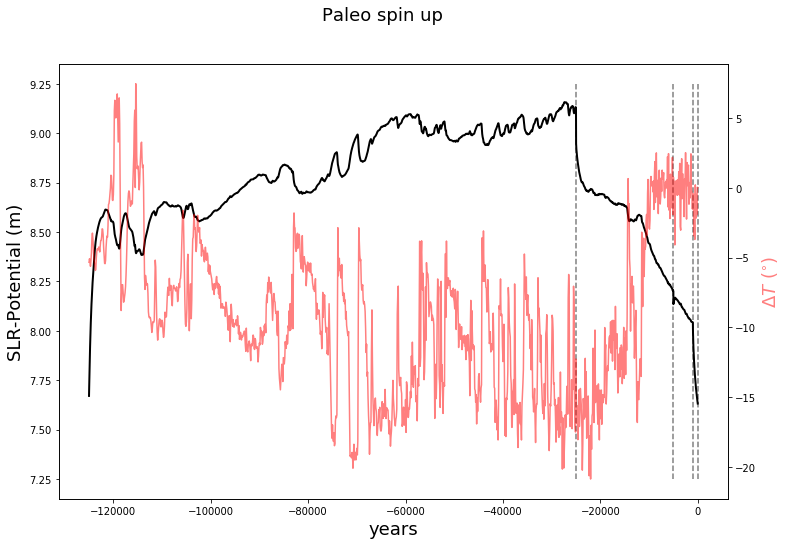

In [10]:
fs = 18
f,ax = plt.subplots(1,1,figsize=(12,8))
ax2 = ax.twinx()
d= da.read_nc(pdd_in_plt + 'pism_dT.nc')
ax2.plot(d.time, d['delta_T'].values, 'r-',alpha = 0.5)
t1=0
for i,name in enumerate(dirs[:-1]):
    
    d = da.read_nc(ptt + name +'/ts_gris_'+str(res[i])+'m.nc','sea_level_rise_potential')

    Slr_pot[t1:t1 +d.time.size]=d.values
    Slr_pot_time[t1:t1 +d.time.size]=d.time/sec_to_year
    t1 =t1+ d.time.size
#     print(t1)
    
    ax.plot([d.time[-1]/sec_to_year,d.time[-1]/sec_to_year],[7.25,9.25], 'k--',alpha = 0.5)
ax.plot(Slr_pot_time,Slr_pot, 'k-', linewidth = 2)

# d = da.read_nc(ptt + dirs[-1] +'/ts_gris_'+str(res[i])+'m.nc','sea_level_rise_potential')
# ax.plot(d.time/sec_to_year,d.values,'r--', label = 'ctrl run')
ax.set_xlabel('years',fontsize = fs)
ax.set_ylabel('SLR-Potential (m)',fontsize = fs)
ax2.set_ylabel('$\Delta T$ $(^{\circ})$',fontsize = fs,color = 'red',alpha = 0.5)
f.suptitle('Paleo spin up',fontsize = fs)

In [12]:
dirs

['paleo_125ka_25ka_sia_e_3.0_run2',
 'paleo_25ka_5ka_sia_e_3.0_run2',
 'paleo_5ka_1ka_sia_e_3.0_run2',
 'paleo_1ka_0a_sia_e_3.0_run2',
 'ctrl_0_100a_sia_e_3.0_run2']

Text(0.5, 0.98, 'ctrl')

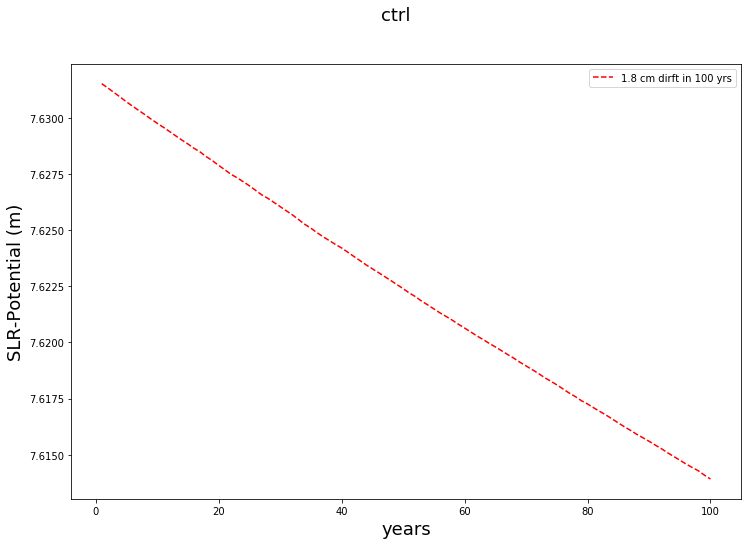

In [11]:
fs = 18
f,ax = plt.subplots(1,1,figsize=(12,8))


d = da.read_nc(ptt + dirs[-1] +'/ts_gris_'+str(res[i])+'m.nc','sea_level_rise_potential')
ax.plot(d.time/sec_to_year,d.values,'r--', label= str(np.round((d.values[0]-d.values[-1])*100,1))+ ' cm dirft in 100 yrs')
ax.set_xlabel('years',fontsize = fs)
ax.set_ylabel('SLR-Potential (m)',fontsize = fs)
ax.legend()
f.suptitle('ctrl',fontsize = fs)

In [14]:
dirs[-2].split('_run2')[0]

['paleo_1ka_0a_sia_e_3.0', '']

No handles with labels found to put in legend.
No handles with labels found to put in legend.


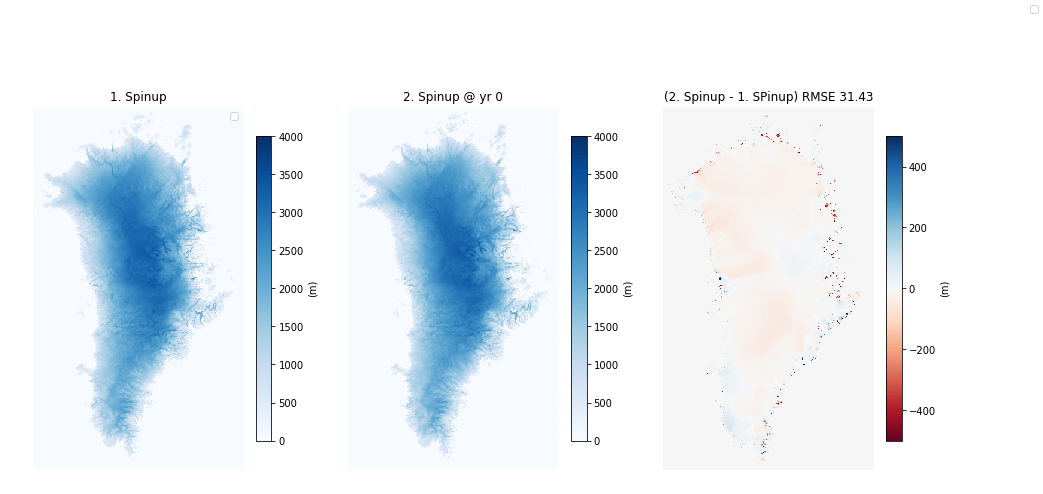

In [24]:
f, ax = plt.subplots(1,3, figsize = (16,8))
vvel =4000
vvel2 =500

# thk0 = da.read_nc('/home/beckmann/mnt/cluhome/icedata/pism_greenland_input/BedMachine/'+beds[-1], 'thickness')
thk0 =thk1 = da.read_nc(ptt + dirs[-2].split('_run2')[0] +'/gris_4500m.nc', 'thk')
thk1 = da.read_nc(ptt + dirs[-2]+'/gris_4500m.nc', 'thk')

css=ax[0].imshow( thk0.values[0,] ,cmap = "Blues",label = 'orig',origin = "lower",vmin=0,vmax=vvel)
cs1=ax[1].imshow( thk1.values[0,] ,cmap = "Blues",label = 'spinup @ 0yrs',origin = "lower",vmin=0,vmax=vvel)
cs2=ax[2].imshow( thk1.values[0,]-thk0.values[0,] ,cmap = "RdBu",label = 'diff',origin = "lower",vmin=-vvel2,vmax=vvel2)
# f.colorbar(css,  label = '(m)')
f.colorbar(css, ax = ax[0], shrink =0.7,label = '(m)')
f.colorbar(css, ax = ax[1], shrink =0.7,label = '(m)')

f.colorbar(cs2, ax = ax[2],shrink =0.7, label = '(m)')
ax[0].set_axis_off()
ax[1].set_axis_off()
ax[2].set_axis_off()

ax[0].set_title('1. Spinup')
ax[1].set_title('2. Spinup @ yr 0')
rme = np.nanmean((thk1.values[0,]-thk0.values[0,])**2)**0.5
ax[2].set_title('(2. Spinup - 1. SPinup) RMSE ' +str(np.round(rme,2)))
ax[0].legend()
f.legend()

Text(0.5, 0, '# Spinup')

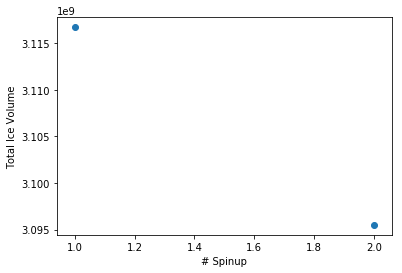

In [31]:
A =4.5**2 
spinups =[1.,2.]
total_ice_volume = [np.nansum(thk0.values[0,])*A,np.nansum(thk1.values[0,])*A]
plt.scatter(spinups, total_ice_volume)
plt.ylabel('Total Ice Volume')
plt.xlabel('# Spinup')

In [24]:
def make_ice_only_mask(mask_oo):
    numbers = [1,4]
    for n in numbers:

        m = mask_oo == n
        mask_oo[m] = 0
    numbers = [2,3]
    for n in numbers:

        m = mask_oo== n
        mask_oo[m] = 1
    return(mask_oo)

In [21]:

mftt = da.read_nc('/home/beckmann/mnt/cluhome/icedata/pism_greenland_input/BedMachine/'+ 'pism_Greenland_4500m_mcb_jpl_v_no_bath_front_retreat.nc', 'land_ice_area_fraction_retreat')
#  mi=da.read_nc(ptt + dirs[-2]+'/gris_4500m.nc', 'thk')

In [48]:
np.unique(mi.values)

array([0, 1], dtype=uint8)

In [22]:
mi=da.read_nc(ptt + dirs[-2]+'/gris_4500m.nc', 'thk')
np.unique(mi.values[0,])

array([0.00000000e+00, 6.67990060e-08, 4.95594630e-07, ...,
       3.42950323e+03, 3.43740646e+03, 3.43775357e+03])

In [25]:
from matplotlib import ticker, cm, colors

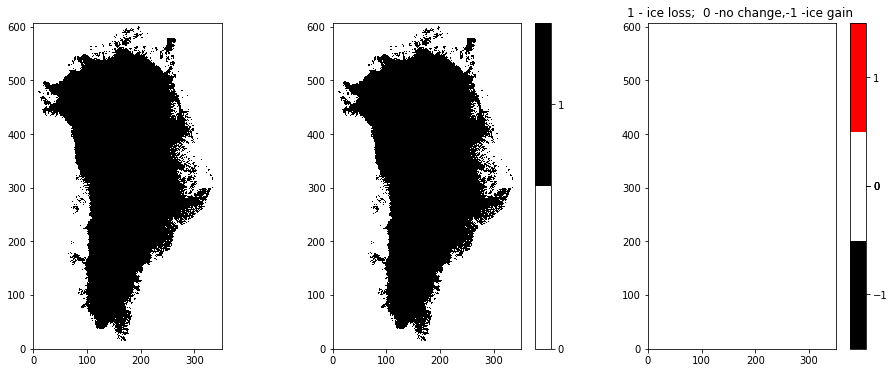

In [26]:
m_i = da.read_nc('/home/beckmann/mnt/cluhome/icedata/pism_greenland_input/BedMachine/'+beds[-1], 'mask')
m_cr = make_ice_only_mask(m_i.values)
m_i = da.read_nc(ptt + dirs[-2]+'/gris_4500m.nc', 'mask')
m_2100 = make_ice_only_mask(m_i.values[0,])
f,ax = plt.subplots(1,3, figsize = (16,6))
cmap = colors.ListedColormap(['white','black'])
bounds=[0,0.5,1.5]
bounds_tick=[0,1]
bounds2=[-1.5,-0.5,0.5,1.5,]
bounds2_tick=[-1.0,-0.,0.,1.0,0] 
cmap2 = colors.ListedColormap(['black','white','red'])
norm = colors.BoundaryNorm(bounds, cmap.N)
norm2 = colors.BoundaryNorm(bounds2, cmap2.N)

# tell imshow about color map so that only set colors are used
# img = plt.imshow(zvals, interpolation='nearest', origin='lower',
#                     cmap=cmap, norm=norm)

# make a color bar

cax =ax[0].imshow(m_cr,origin = 'lower',cmap=cmap, norm=norm)
cax =ax[1].imshow(mftt,origin = 'lower',cmap=cmap, norm=norm)

plt.colorbar(cax,ax = ax[1] ,cmap=cmap, norm=norm, boundaries=bounds, ticks=bounds_tick)

# ax[0].set_title('ice mask 1950 (spinup)')
# ax[1].set_title('ice mask 2100')
ax[2].set_title('ice mask change orig-spinup')
# ax[1].imshow(m_2100,origin = 'lower',cmap=cmap, norm=norm)
cax2=ax[2].imshow(m_cr- mftt,origin = 'lower', cmap=cmap2, norm = norm2)
# ax[1].set_title('Thickness BedMachine (Morlighem et al.)')
# relErr =(np.sum(d1.values[0,:])-np.sum(thk_obs))/np.sum(thk_obs)
# ax[2].set_title(' Ice Volume relative error '+str(np.round(relErr*100,2))+'%')
# # ax[2].imshow((d1.values[0,:]-vel_obs)/vel_obs,origin = 'lower',vmin =0.1,vmax = 200000)
# cax2 =ax[2].imshow((d1.values[0,:]-thk_obs),origin = 'lower',vmin =-800,vmax = 800, cmap = "RdBu_r")
# f.colorbar(cax, ax = ax[1])
plt.title('1 - ice loss;  0 -no change,-1 -ice gain ')
f.colorbar(cax2, ax = ax[2],cmap=cmap2, norm=norm2, boundaries=bounds2, ticks=bounds2_tick)

In [16]:
# my retreat file and pisn orig ice mask are the same, that is good!

In [40]:
m_cr

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

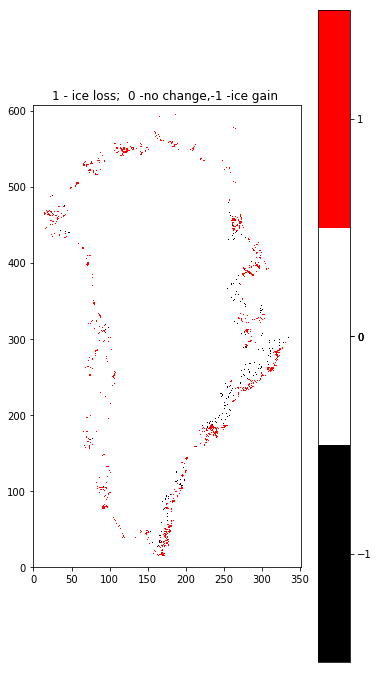

In [27]:
m_i = da.read_nc('/home/beckmann/mnt/cluhome/icedata/pism_greenland_input/BedMachine/'+beds[-1], 'mask')
m_cr = make_ice_only_mask(m_i.values)
m_i = da.read_nc(ptt + dirs[-2]+'/gris_4500m.nc', 'mask')
m_2100 = make_ice_only_mask(m_i.values[0,]) #new ich maks
f,ax = plt.subplots(1,1, figsize = (6,12))
cmap = colors.ListedColormap(['white','black'])
bounds=[0,0.5,1.5]
bounds_tick=[0,1]
bounds2=[-1.5,-0.5,0.5,1.5,]
bounds2_tick=[-1.0,-0.,0.,1.0,0] 
cmap2 = colors.ListedColormap(['black','white','red'])
norm = colors.BoundaryNorm(bounds, cmap.N)
norm2 = colors.BoundaryNorm(bounds2, cmap2.N)

# tell imshow about color map so that only set colors are used
# img = plt.imshow(zvals, interpolation='nearest', origin='lower',
#                     cmap=cmap, norm=norm)

# make a color bar

# cax =ax[0].imshow(m_cr,origin = 'lower',cmap=cmap, norm=norm)
# plt.colorbar(cax,ax = ax[1] ,cmap=cmap, norm=norm, boundaries=bounds, ticks=bounds_tick)

# ax[0].set_title('ice mask 1950 (spinup)')
# ax[1].set_title('ice mask 2100')
ax.set_title('ice mask change orig-spinup')
# ax[1].imshow(m_2100,origin = 'lower',cmap=cmap, norm=norm)
cax2=ax.imshow(m_cr- m_2100,origin = 'lower', cmap=cmap2, norm = norm2)
# ax[1].set_title('Thickness BedMachine (Morlighem et al.)')
# relErr =(np.sum(d1.values[0,:])-np.sum(thk_obs))/np.sum(thk_obs)
# ax[2].set_title(' Ice Volume relative error '+str(np.round(relErr*100,2))+'%')
# # ax[2].imshow((d1.values[0,:]-vel_obs)/vel_obs,origin = 'lower',vmin =0.1,vmax = 200000)
# cax2 =ax[2].imshow((d1.values[0,:]-thk_obs),origin = 'lower',vmin =-800,vmax = 800, cmap = "RdBu_r")
# f.colorbar(cax, ax = ax[1])
plt.title('1 - ice loss;  0 -no change,-1 -ice gain ')
f.colorbar(cax2, ax = ax,cmap=cmap2, norm=norm2, boundaries=bounds2, ticks=bounds2_tick)

In [28]:
diff=m_cr- m_2100
m = diff ==1
diff[m]=0

(220, 320)

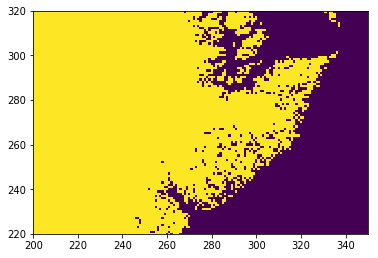

In [32]:
f,ax = plt.subplots(1,1, figsize = (6,12))
# ax.imshow(diff+mftt,origin = 'lower')
ax.imshow(mftt, origin = 'lower')
# ax.imshow(diff,alpha = 0.5,origin = 'lower')
ax.set_xlim([200,350])
ax.set_ylim([220,320])

(220, 320)

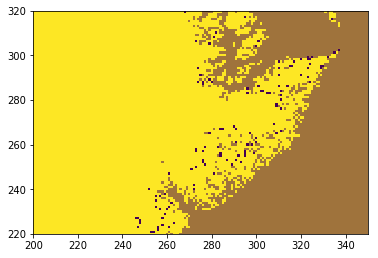

In [37]:
f,ax = plt.subplots(1,1, figsize = (6,12))
# ax.imshow(diff+mftt,origin = 'lower')
ax.imshow(mftt, origin = 'lower')
ax.imshow(diff,alpha = 0.5,origin = 'lower')
ax.set_xlim([200,350])
ax.set_ylim([220,320])

## #let us check the ice thickness to that

In [35]:
thk1.values.shape

(1, 608, 352)

(220, 320)

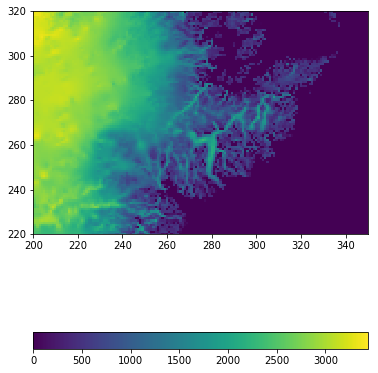

In [61]:
f,ax = plt.subplots(1,1, figsize = (6,12))
# ax.imshow(diff+mftt,origin = 'lower')
im =ax.imshow(thk1.values[0,], origin = 'lower')
f.colorbar(im,orientation = 'horizontal')

# ax.imshow(diff,alpha = 0.5,origin = 'lower')
ax.set_xlim([200,350])
ax.set_ylim([220,320])

(220, 320)

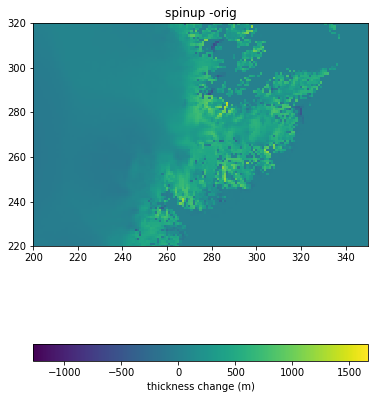

In [67]:
f,ax = plt.subplots(1,1, figsize = (6,12))
# ax.imshow(diff+mftt,origin = 'lower')
im =ax.imshow(thk1.values[0,]-thk0.values, origin = 'lower')
f.colorbar(im,orientation = 'horizontal', label = 'thickness change (m)')
ax.set_title('spinup -orig')
# ax.imshow(diff,alpha = 0.5,origin = 'lower')
ax.set_xlim([200,350])
ax.set_ylim([220,320])

In [45]:
thk_spin = thk1.values[0,].copy()

#### now take away those ice growing cells

In [41]:
np.unique(diff_bool)

array([0, 1], dtype=int32)

In [50]:
diff_bool = diff 
diff_bool = diff == -1

In [51]:
thk_spin[diff_bool]=0

(220, 320)

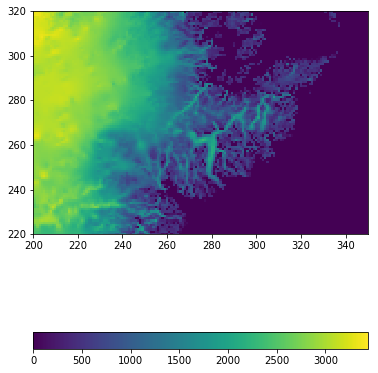

In [56]:
f,ax = plt.subplots(1,1, figsize = (6,12))
# ax.imshow(diff+mftt,origin = 'lower')
im =ax.imshow(thk_spin, origin = 'lower')
f.colorbar(im,orientation = 'horizontal')
# ax.imshow(diff,alpha = 0.5,origin = 'lower')
ax.set_xlim([200,350])
ax.set_ylim([220,320])

(220, 320)

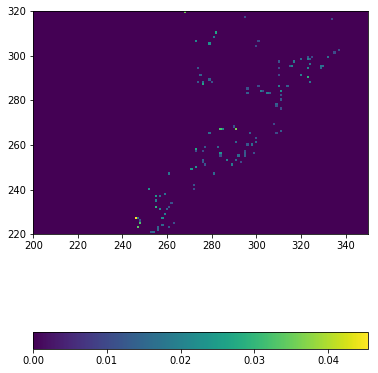

In [58]:
f,ax = plt.subplots(1,1, figsize = (6,12))
# ax.imshow(diff+mftt,origin = 'lower')
im = ax.imshow(thk1.values[0,]-thk_spin, origin = 'lower')
f.colorbar(im,orientation = 'horizontal')
# ax.imshow(diff,alpha = 0.5,origin = 'lower')
ax.set_xlim([200,350])
ax.set_ylim([220,320])

In [69]:
thk1

dimarray: 214016 non-null elements (0 null)
0 / time (1): 0.0 to 0.0
1 / y (608): -3369350.0 to -637850.0
2 / x (352): -676400.0 to 903100.0
array(...)

In [73]:
h_new=da.DimArray(thk_spin.tolist(),axes = [thk1.y,thk1.x],dims = ['y','x'])
dataset =da.Dataset({'thk':h_new})
dataset.write_nc('thk_spinup1_no_ice_growth.nc')

In [28]:
#and forc to thickenss?
ftt = da.read_nc('/home/beckmann/mnt/cluhome/icedata/pism_greenland_input/BedMachine/ftt_4500m.nc')


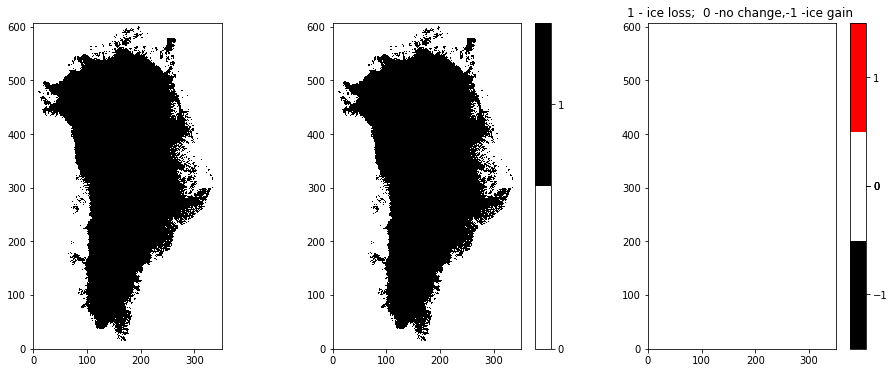

In [34]:
m_i = da.read_nc('/home/beckmann/mnt/cluhome/icedata/pism_greenland_input/BedMachine/'+beds[-1], 'mask')
m_cr = make_ice_only_mask(m_i.values)
m_i = da.read_nc(ptt + dirs[-2]+'/gris_4500m.nc', 'mask')
m_2100 = make_ice_only_mask(m_i.values[0,])
f,ax = plt.subplots(1,3, figsize = (16,6))
cmap = colors.ListedColormap(['white','black'])
bounds=[0,0.5,1.5]
bounds_tick=[0,1]
bounds2=[-1.5,-0.5,0.5,1.5,]
bounds2_tick=[-1.0,-0.,0.,1.0,0] 
cmap2 = colors.ListedColormap(['black','white','red'])
norm = colors.BoundaryNorm(bounds, cmap.N)
norm2 = colors.BoundaryNorm(bounds2, cmap2.N)

# tell imshow about color map so that only set colors are used
# img = plt.imshow(zvals, interpolation='nearest', origin='lower',
#                     cmap=cmap, norm=norm)

# make a color bar

cax =ax[0].imshow(ftt['ftt_mask'].values*-1+1,origin = 'lower',cmap=cmap, norm=norm)
cax =ax[1].imshow(mftt,origin = 'lower',cmap=cmap, norm=norm)

plt.colorbar(cax,ax = ax[1] ,cmap=cmap, norm=norm, boundaries=bounds, ticks=bounds_tick)

# ax[0].set_title('ice mask 1950 (spinup)')
# ax[1].set_title('ice mask 2100')
ax[2].set_title('ice mask change orig-spinup')
# ax[1].imshow(m_2100,origin = 'lower',cmap=cmap, norm=norm)
cax2=ax[2].imshow(ftt['ftt_mask'].values*-1+1- mftt,origin = 'lower', cmap=cmap2, norm = norm2)
# ax[1].set_title('Thickness BedMachine (Morlighem et al.)')
# relErr =(np.sum(d1.values[0,:])-np.sum(thk_obs))/np.sum(thk_obs)
# ax[2].set_title(' Ice Volume relative error '+str(np.round(relErr*100,2))+'%')
# # ax[2].imshow((d1.values[0,:]-vel_obs)/vel_obs,origin = 'lower',vmin =0.1,vmax = 200000)
# cax2 =ax[2].imshow((d1.values[0,:]-thk_obs),origin = 'lower',vmin =-800,vmax = 800, cmap = "RdBu_r")
# f.colorbar(cax, ax = ax[1])
plt.title('1 - ice loss;  0 -no change,-1 -ice gain ')
f.colorbar(cax2, ax = ax[2],cmap=cmap2, norm=norm2, boundaries=bounds2, ticks=bounds2_tick)

In [32]:
np.unique(ftt['ftt_mask'].values)

array([0, 1], dtype=uint8)

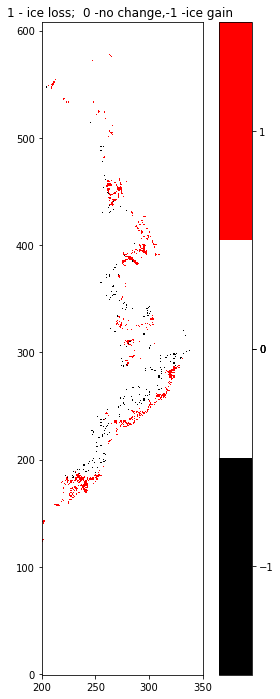

In [41]:
m_i = da.read_nc('/home/beckmann/mnt/cluhome/icedata/pism_greenland_input/BedMachine/'+beds[-1], 'mask')
m_cr = make_ice_only_mask(m_i.values)
m_i = da.read_nc(ptt + dirs[-2]+'/gris_4500m.nc', 'mask')
m_2100 = make_ice_only_mask(m_i.values[0,]) #new ich maks
f,ax = plt.subplots(1,1, figsize = (6,12))
cmap = colors.ListedColormap(['white','black'])
bounds=[0,0.5,1.5]
bounds_tick=[0,1]
bounds2=[-1.5,-0.5,0.5,1.5,]
bounds2_tick=[-1.0,-0.,0.,1.0,0] 
cmap2 = colors.ListedColormap(['black','white','red'])
norm = colors.BoundaryNorm(bounds, cmap.N)
norm2 = colors.BoundaryNorm(bounds2, cmap2.N)

# tell imshow about color map so that only set colors are used
# img = plt.imshow(zvals, interpolation='nearest', origin='lower',
#                     cmap=cmap, norm=norm)

# make a color bar

# cax =ax[0].imshow(m_cr,origin = 'lower',cmap=cmap, norm=norm)
# plt.colorbar(cax,ax = ax[1] ,cmap=cmap, norm=norm, boundaries=bounds, ticks=bounds_tick)

# ax[0].set_title('ice mask 1950 (spinup)')
# ax[1].set_title('ice mask 2100')
ax.set_title('ice mask change orig-spinup')
# ax[1].imshow(m_2100,origin = 'lower',cmap=cmap, norm=norm)
cax2=ax.imshow(m_cr- m_2100,origin = 'lower', cmap=cmap2, norm = norm2)
# ax[1].set_title('Thickness BedMachine (Morlighem et al.)')
# relErr =(np.sum(d1.values[0,:])-np.sum(thk_obs))/np.sum(thk_obs)
# ax[2].set_title(' Ice Volume relative error '+str(np.round(relErr*100,2))+'%')
# # ax[2].imshow((d1.values[0,:]-vel_obs)/vel_obs,origin = 'lower',vmin =0.1,vmax = 200000)
# cax2 =ax[2].imshow((d1.values[0,:]-thk_obs),origin = 'lower',vmin =-800,vmax = 800, cmap = "RdBu_r")
# f.colorbar(cax, ax = ax[1])
ax.set_xlim([200,350])
plt.title('1 - ice loss;  0 -no change,-1 -ice gain ')
f.colorbar(cax2, ax = ax,cmap=cmap2, norm=norm2, boundaries=bounds2, ticks=bounds2_tick)

In [43]:
ftt

NameError: name 'ftt' is not defined

In [44]:
 'pism_Greenland_4500m_mcb_jpl_v_no_bath_front_retreat.nc'

'pism_Greenland_4500m_mcb_jpl_v_no_bath_front_retreat.nc'

In [45]:
input_dir

'/home/beckmann/icedata/pism_greenland_input/BedMachine/'